In [1]:
import sys
sys.path.append('..')

import numpy as np
import pandas as pd

from tqdm.auto import tqdm

from olfactory_navigation import Environment
from olfactory_navigation.agents import FSVI_Agent
from olfactory_navigation.simulation import run_test, SimulationHistory
from olfactory_navigation.test_setups import test_shape_robustness, test_scale_robustness
from olfactory_navigation.visualization import plot_shape_robustness_performance, plot_full_shape_robustness_analysis

# Loading Environment

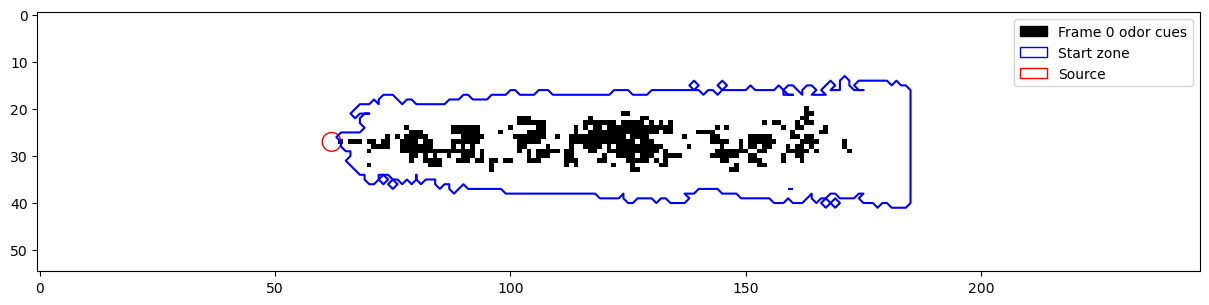

In [2]:
# data_file = "C:\\Users\\arnau\\Desktop\\Master Thesis Files [TO BACKUP]\\Data\\nose_data.npy"
data_file = "/storage/rando/data/nose_data.npy"

full_env = Environment(data_file=data_file,
                       data_source_position=[143,0],
                       source_radius=2,
                       shape=np.array([55,247]),
                       margins=[14,62],
                       boundary_condition='wrap_vertical',
                       start_zone='odor_present',
                       odor_present_threshold=3e-6
                       )

full_env.plot()

# Base Agent training

In [3]:
ag = FSVI_Agent(full_env)

In [4]:
_ = ag.train(expansions=300, force=True, use_gpu=True)

[06/13/2024, 16:16:48] MDP_policy, not provided. Solving MDP with Value Iteration...
[06/13/2024, 16:16:48] Sending Model to GPU...
[06/13/2024, 16:16:49]     > Done in 1.021s


  0%|          | 0/1000 [00:00<?, ?it/s]

Summary of Value Iteration run
  - Model: 13585-state, 4-action
  - Converged in 918 iterations and 0.6500 seconds
  - Took on average 0.0007s per iteration


Expansions:   0%|          | 0/300 [00:00<?, ?it/s]

Summary of Point Based Value Iteration run
  - Model: 13585 state, 4 action, 3 observations
  - Converged or stopped after 300 expansion steps and 300 backup steps.
  - Resulting value function has 2230 alpha vectors.
  - Converged in 22.1661s

  - Expand function took on average 0.0082s and yielded on average 683.91 beliefs per iteration. (0.0001s/it/belief)
  - Backup function took on average 0.0657s and yielded on average 7.42 alpha vectors per iteration. (0.0004s/it/alpha)
  - Pruning function took on average 0.0000s and yielded on average prunings of 0.00 alpha vectors per iteration.


# Scale robustness test

In [5]:
all_sim_hists = test_scale_robustness(ag, use_gpu=True)

The results will be saved to: ./results/20240613_161715_scale_robustness_test_55_247-marg_14_14_62_62-edge_wrap_vertical-start_odor_present-source_27_62_radius2



  0%|          | 0/9 [00:00<?, ?it/s]

Testing on environment with scale modifier 20%
[06/13/2024, 16:17:21] Sending Model to GPU...
[06/13/2024, 16:17:21]     > Done in 0.001s
Simulations done in 3.053s:
Simulations reached goal: 113/124 (11 failures (reached horizon: 11)) (91.13% success)
 - Average step count:                 105.468 +- 279.22 (Successfull only: 18.389 +- 8.63)
 - Extra steps:                        91.102 +- 280.72 (Successful only: 3.524 +- 3.06)
 - Average discounted rewards (ADR):   0.760 +- 0.25 (Successfull only: 0.834 +- 0.07)
 - Tmin/T:                             0.744 +- 0.26 (Successful only: 0.815 +- 0.14)
Simulations saved to: ./results/20240613_161715_scale_robustness_test_55_247-marg_14_14_62_62-edge_wrap_vertical-start_odor_present-source_27_62_radius2/test_env_mult-20.csv

Testing on environment with scale modifier 40%
[06/13/2024, 16:17:27] Sending Model to GPU...
[06/13/2024, 16:17:27]     > Done in 0.002s
Simulations done in 3.273s:
Simulations reached goal: 55/432 (377 failures (reac

In [6]:
df = pd.read_csv('./results/20240613_161715_scale_robustness_test_55_247-marg_14_14_62_62-edge_wrap_vertical-start_odor_present-source_27_62_radius2/_analysis.csv')

<Axes: xlabel='multiplier'>

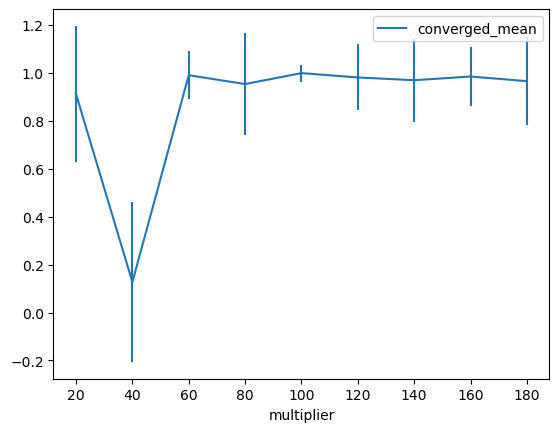

In [7]:
df.plot(x='multiplier', y='converged_mean', yerr='converged_standard_deviation')

# Shape robustness test

In [8]:
all_histories = test_shape_robustness(
    agent=ag,
    use_gpu=True
)

The results will be saved to: ./results/20240613_162611_shape_robustness_test_55_247-marg_14_14_62_62-edge_wrap_vertical-start_odor_present-source_27_62_radius2



  0%|          | 0/63 [00:00<?, ?it/s]

Testing on environment with height 20% and width 20%
Using the provided environment, not the agent environment.
Simulations done in 11.209s:
Simulations reached goal: 1207/2393 (1186 failures (reached horizon: 1186)) (50.44% success)
 - Average step count:                 583.791 +- 418.33 (Successfull only: 174.824 +- 97.43)
 - Extra steps:                        512.758 +- 411.59 (Successful only: 107.218 +- 58.56)
 - Average discounted rewards (ADR):   0.140 +- 0.24 (Successfull only: 0.278 +- 0.27)
 - Tmin/T:                             0.250 +- 0.21 (Successful only: 0.423 +- 0.16)
Simulations saved to: ./results/20240613_162611_shape_robustness_test_55_247-marg_14_14_62_62-edge_wrap_vertical-start_odor_present-source_27_62_radius2/test_env_y-20_x-20.csv

Testing on environment with height 20% and width 40%
Using the provided environment, not the agent environment.
Simulations done in 8.469s:
Simulations reached goal: 1701/2393 (692 failures (reached horizon: 692)) (71.08% success

In [9]:
file = './results/20240613_162611_shape_robustness_test_55_247-marg_14_14_62_62-edge_wrap_vertical-start_odor_present-source_27_62_radius2/_analysis.csv'
df = pd.read_csv(file)

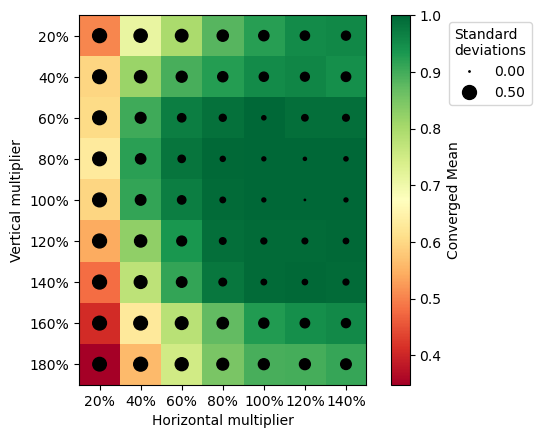

In [10]:
plot_shape_robustness_performance(df)

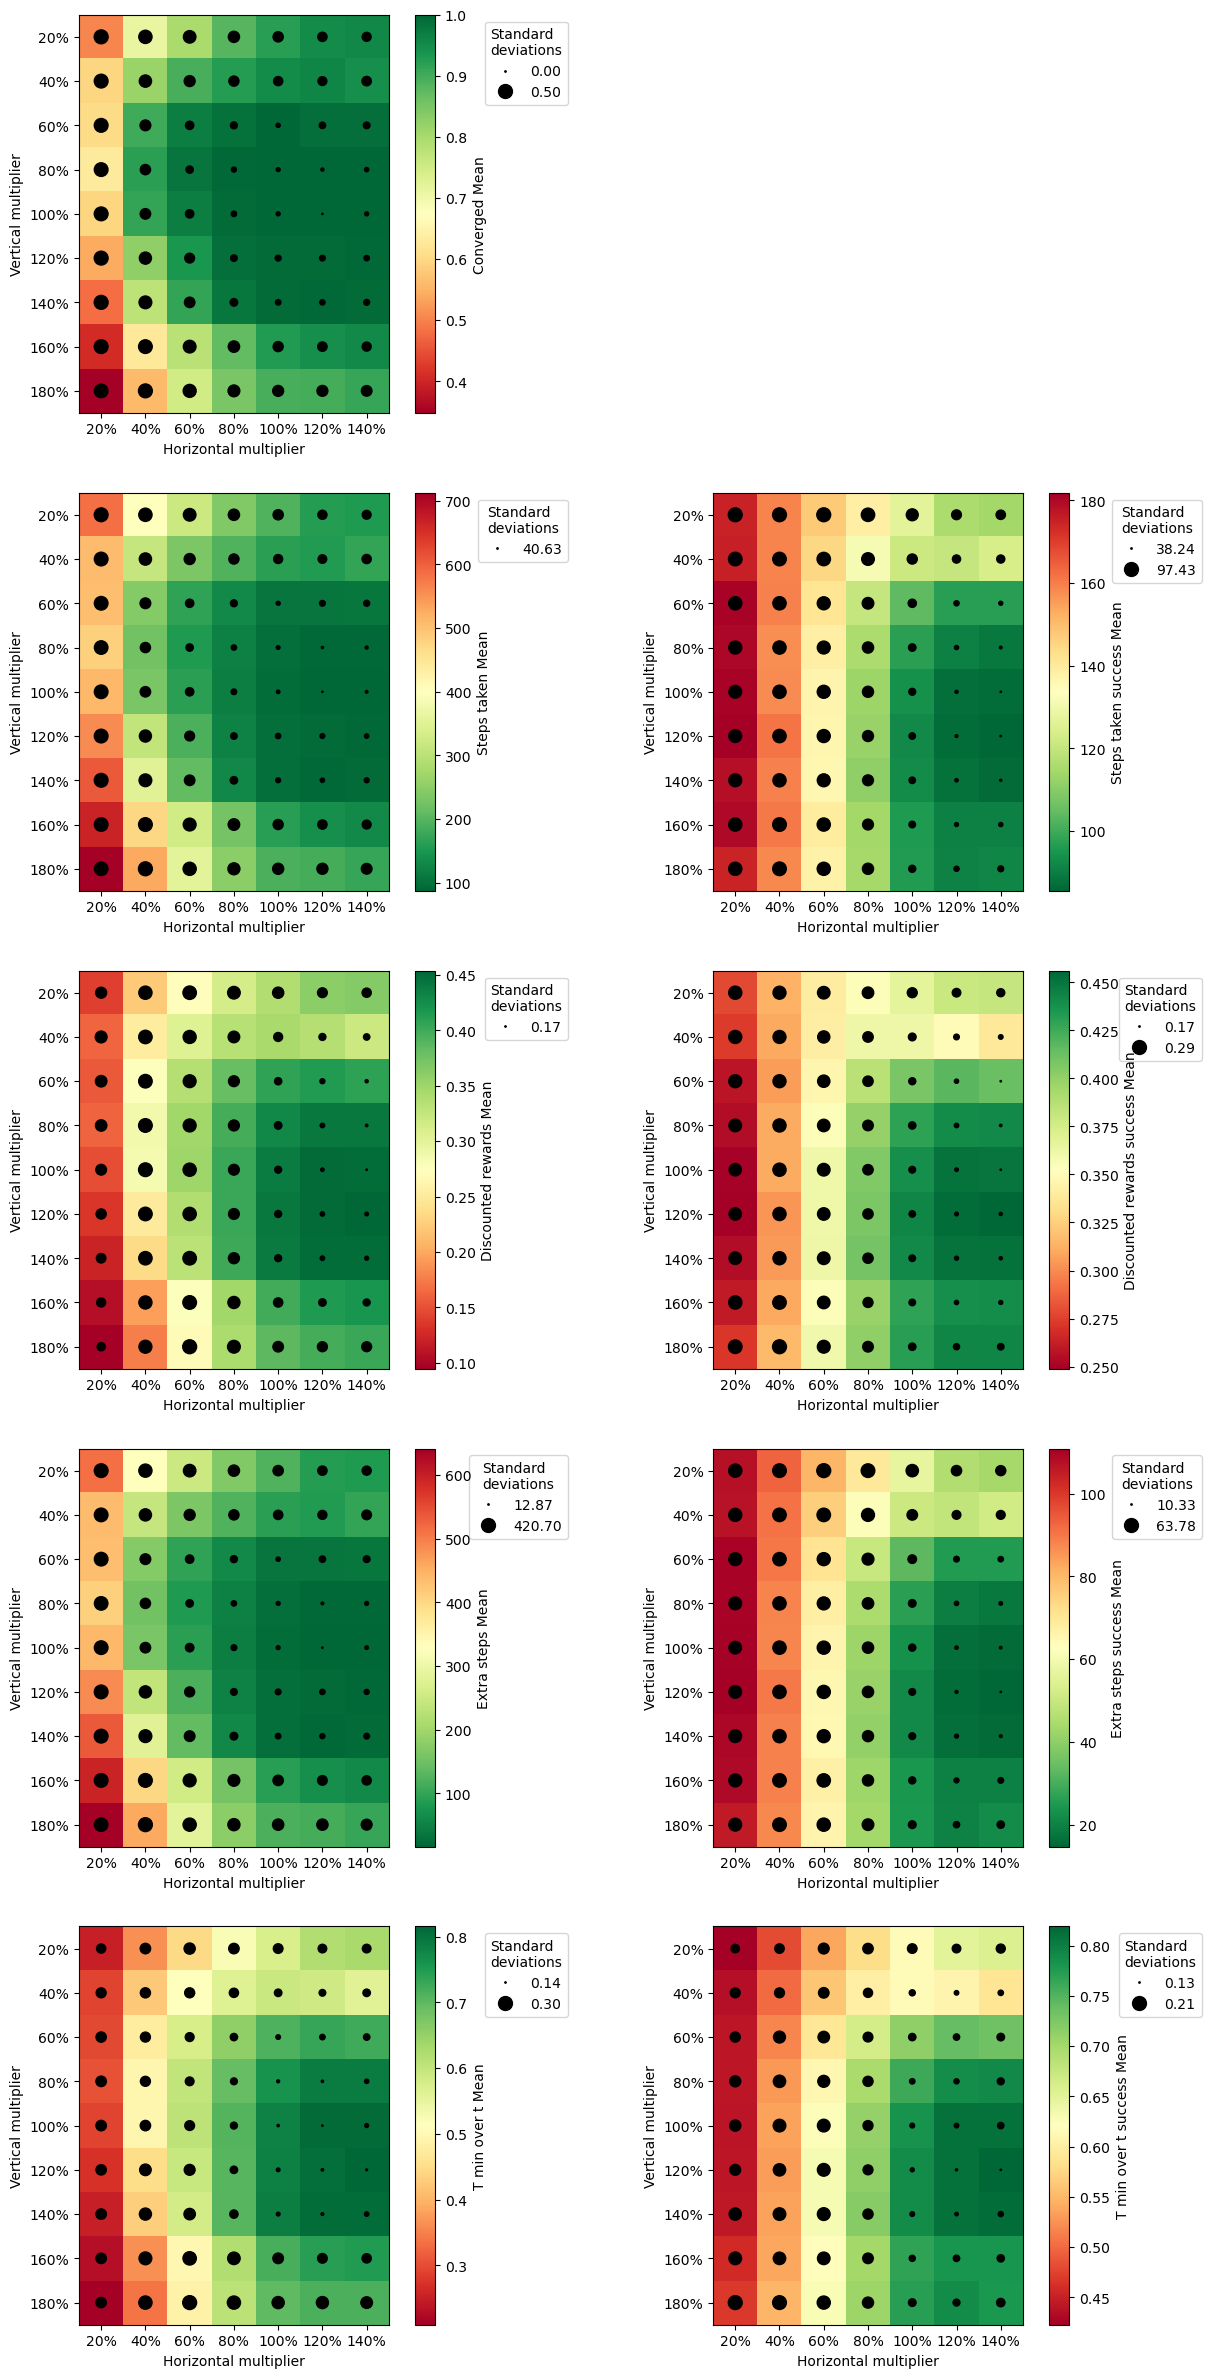

In [11]:
plot_full_shape_robustness_analysis(df)